## Машинное обучение, ФКН ВШЭ

## Практическое задание 2

### Общая информация
Дата выдачи: 3 ноября 2017

Мягкий дедлайн: 23:59MSK 19 ноября (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 26 ноября.

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии
- реализуете логистическую регрессию и её обучение градиентным спуском
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-02-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-02-IvanovIvan.ipynb). Приложите модули с кодом logreg.py и заархивируйте оба файла вместе в zip формат. Имя архива должно быть homework-practice-02-Username.zip)

Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+151@gmail.com для студентов группы БПМИ-151).


Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

** Оценка:** ...

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

Lasso (R1)
	 MAE:	0.972334506443
	 MSE:	0.950199853546
	 Zero coefs:	29
Ridge (R2)
	 MAE:	0.719040556128
	 MSE:	0.686998201514
	 Zero coefs:	1


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


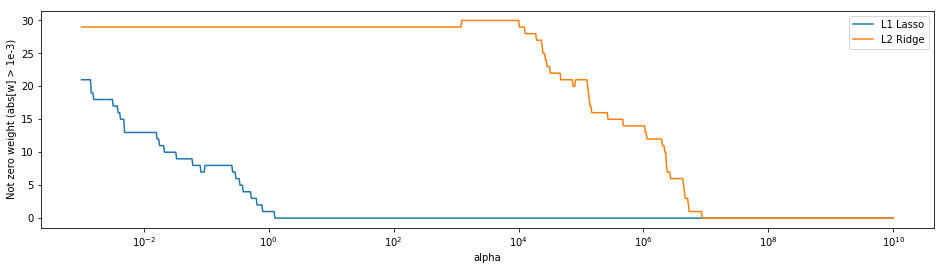

In [266]:
# Your code here
# ...
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics      import mean_absolute_error, mean_squared_error
count_zeros = lambda x: len([i for i in x if abs(i)<1e-3])
count_non_zeros = lambda x: len([i for i in x if abs(i)>1e-3])


model  = Lasso()
y_pred =model.fit(X_train, y_train).predict(X_train)
print("Lasso (R1)")
print("\t MAE:\t"+str(mean_absolute_error(y_pred, y_train)))
print("\t MSE:\t"+str(mean_squared_error( y_pred, y_train)))
print("\t Zero coefs:\t"+str(count_zeros(model.coef_)))

model  = Ridge()
y_pred = model.fit(X_train, y_train).predict(X_train)
print("Ridge (R2)")
print("\t MAE:\t"+str(mean_absolute_error(y_pred, y_train)))
print("\t MSE:\t"+str(mean_squared_error( y_pred, y_train)))
print("\t Zero coefs:\t"+str(count_zeros(model.coef_)))

params = [10**i for i in np.linspace(-3,10,num = 1000)]

zeros_L1 = []
zeros_L2 = []

for alpha in params:
    model = Lasso(alpha = alpha)
    model.fit(X_train, y_train)
    num_of_zeros = count_non_zeros(model.coef_)
    zeros_L1.append(num_of_zeros)
    
    model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    num_of_zeros = count_non_zeros(model.coef_)
    zeros_L2.append(num_of_zeros)
    
plt.plot(params, zeros_L1, label = "L1 Lasso")
plt.plot(params, zeros_L2, label = "L2 Ridge")
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("Not zero weight (abs[w] > 1e-3)")
plt.legend()
plt.show()

> Все согласуется с теорией: L1 регуляризация обнуляет веса.
Для большого парамера регуляризатора, L2 делает почти нулевыми сразу все веса.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [4]:
# Your code here
# ...
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = Ridge().fit(X_train, y_train)
name = ["\n\tTrain","\n\tTest"]
for c,(X, y) in enumerate([[X_train, y_train], [X_test, y_test]]):
    print(name[c])
    y_predict = model.predict(X)
    print("MAE:\t"+str(mean_absolute_error(y_predict, y)))
    print("MSE:\t"+str(mean_squared_error(y_predict, y)))
    print("R2 :\t"+str(r2_score(y, y_predict)))
y_predict = [np.mean(y) for i in y ]


	Train
MAE:	48.4153681255
MSE:	3402.04023328
R2 :	0.450960957143

	Test
MAE:	49.6028460728
MSE:	3399.40482339
R2 :	0.359899386837


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [5]:
# Your code here
# ...
data = load_diabetes()
X, y = data.data, data.target
from sklearn.model_selection import GridSearchCV, KFold
alpha_params = [10**i for i in np.linspace(-3,3,num = 200)]
param_grid = {
    'alpha': alpha_params,
}

model = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv = 5,
                     scoring=["neg_mean_absolute_error",'neg_mean_squared_error', "r2"], refit = 'r2')
model.fit(X, y)
res = -model.cv_results_['mean_train_neg_mean_absolute_error']
print("BEST alpha for MAE: %f (MAE: %f ) " % (alpha_params[np.argmin(res)], min(res)))

res = -model.cv_results_['mean_train_neg_mean_squared_error']
print("BEST alpha for MSE: %f (MSE: %f ) " % (alpha_params[np.argmin(res)], min(res)))

res = model.cv_results_['mean_train_r2']
print("BEST alpha for r2:  %f (r2: %f ) " % (alpha_params[np.argmax(res)], max(res)))

BEST alpha for MAE: 0.001000 (MAE: 43.163458 ) 
BEST alpha for MSE: 0.001000 (MSE: 2845.804021 ) 
BEST alpha for r2:  0.001000 (r2: 0.519445 ) 


#### $ПЕРЕДЕЛАТЬ (20 мин, глянуть в чужой код)

mean plots


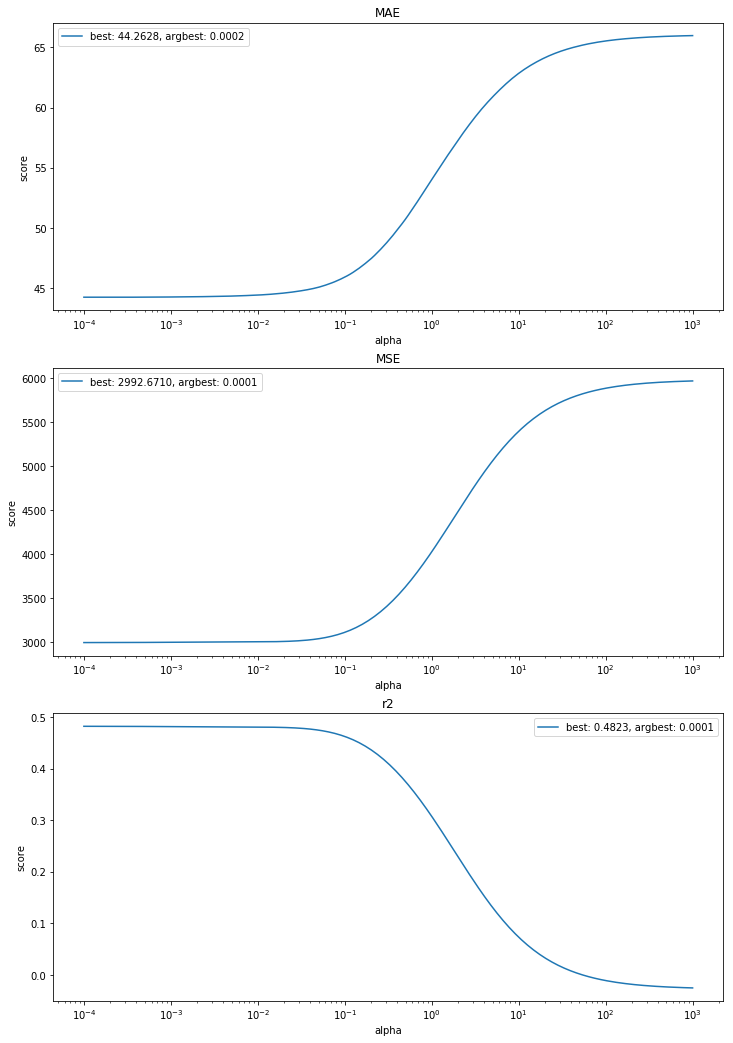

In [6]:
print("mean plots")
data = load_diabetes()
X, y = data.data, data.target
from sklearn.model_selection import GridSearchCV, KFold
alpha_params = [10**i for i in np.linspace(-4,3,num = 200)]
param_grid = {
    'alpha': alpha_params,
}

def draw_plot_arg_score(ax, name, reverse = True, find = "MIN"):
    res = model.cv_results_[name] * (-1 if reverse else 1)
    BEST = np.min(res) if find == "MIN" else np.max(res)
    ARGBEST = alpha_params[np.argmin(res) if find == "MIN" else np.argmax(res)]
    ax.plot(alpha_params, res, label = "best: %4.4f, argbest: %4.4f"% (BEST, ARGBEST))
    return ax

fig, (ax1,ax2,ax3) = plt.subplots(3)
fig.set_size_inches(12,18)
ax1.set_title("MAE")
draw_plot_arg_score(ax1, 'mean_test_neg_mean_absolute_error')
ax1.legend()
ax1.set_ylabel("score")
ax1.set_xlabel('alpha')
ax1.semilogx()

ax2.set_title("MSE")
draw_plot_arg_score(ax2,'mean_test_neg_mean_squared_error')
ax2.legend()
ax2.set_ylabel("score")
ax2.set_xlabel('alpha')
ax2.semilogx()

ax3.set_title("r2")
draw_plot_arg_score(ax3, 'mean_test_r2', reverse = False, find = "MAX")
ax3.legend()
ax3.set_ylabel("score")
ax3.set_xlabel('alpha')
ax3.semilogx()


plt.show()

Plots by split


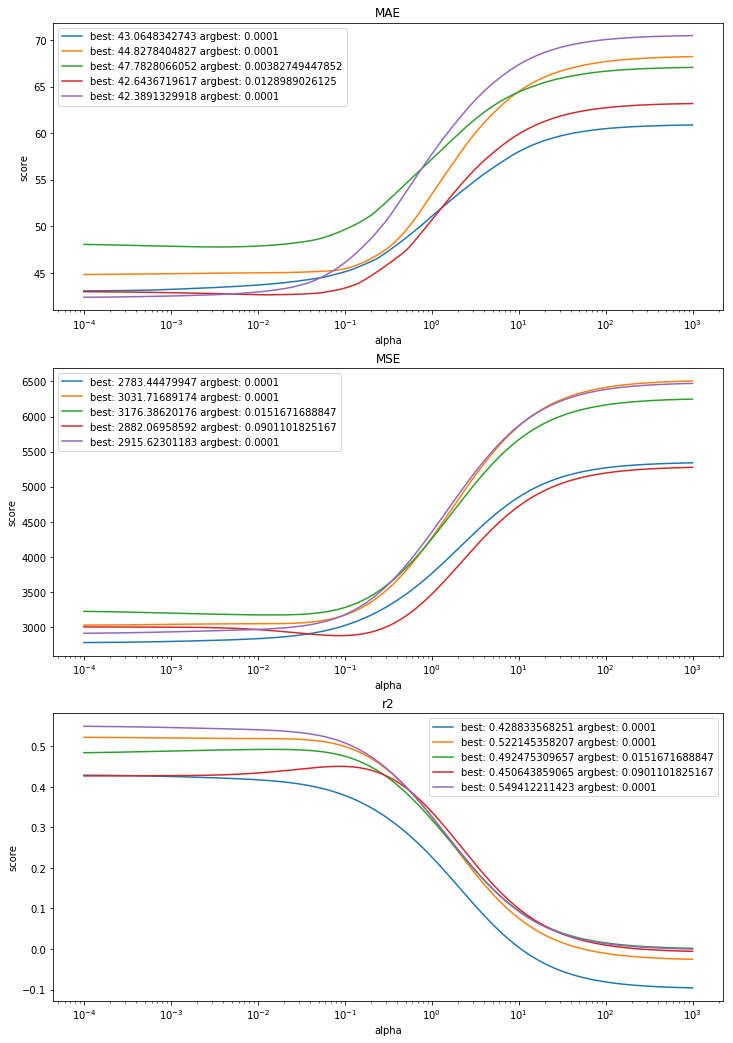

In [7]:
# Your code here
# ...
print("Plots by split")
data = load_diabetes()
X, y = data.data, data.target
from sklearn.model_selection import GridSearchCV, KFold
alpha_params = [10**i for i in np.linspace(-4,3,num = 200)]
param_grid = {
    'alpha': alpha_params,
}

def draw_plot_arg_score(ax, name, reverse = True, find = "MIN"):
    res = model.cv_results_[nm] * (-1 if reverse else 1)
    BEST = np.min(res) if find == "MIN" else np.max(res)
    ARGBEST = alpha_params[np.argmin(res) if find == "MIN" else np.argmax(res)]
    ax.plot(alpha_params, res, label = "best: "+str(BEST)+" argbest: "+str(ARGBEST))
    return ax1

fig, (ax1,ax2,ax3) = plt.subplots(3)
fig.set_size_inches(12,18)
ax1.set_title("MAE")
for nm in ['split'+str(i)+'_test_neg_mean_absolute_error' for i in range(5)]:
    draw_plot_arg_score(ax1, nm)
ax1.legend()
ax1.set_ylabel("score")
ax1.set_xlabel('alpha')
ax1.semilogx()

ax2.set_title("MSE")
for nm in ['split'+str(i)+'_test_neg_mean_squared_error' for i in range(5)]:
    draw_plot_arg_score(ax2, nm)
ax2.legend()
ax2.set_ylabel("score")
ax2.set_xlabel('alpha')
ax2.semilogx()

ax3.set_title("r2")
for nm in ['split'+str(i)+'_test_r2' for i in range(5)]:
    draw_plot_arg_score(ax3, nm, reverse = False, find = "MAX")
ax3.legend()
ax3.set_ylabel("score")
ax3.set_xlabel('alpha')
ax3.semilogx()


plt.show()

>1. Качество изменилось заметно MSE(+20%), MAE(+20%), R2(+20%)
2. По граффикам видно, что в выборке однозначно есть выбросы.( На некоторых сплитах параметр alpha отличается на порядок)

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

#### $ПЕРЕДЕЛАТЬ (10 мин, глянуть в чужой код)

In [8]:
data = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(data.data, data.target, test_size=0.3, random_state=241)

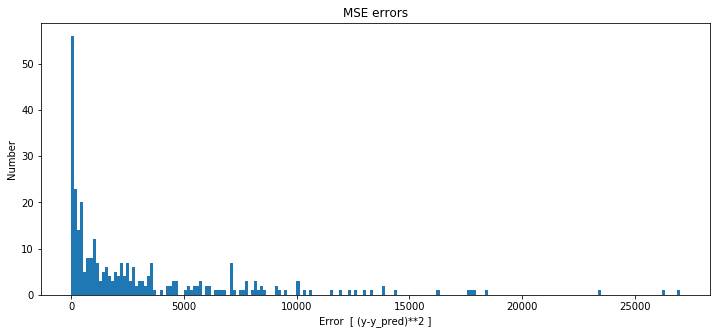

In [9]:
# Your code here
# ...
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(Ridge(alpha = 0.001), X_train, y_train, cv = 10,)
plt.figure(figsize = (12,5))
plt.title("MSE errors")
plt.ylabel("Number")
plt.xlabel("Error  [ (y-y_pred)**2 ]")
plt.hist((y_train-y_pred)**2, bins = 200)
plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

>Выкеним объекты с ошибкой больше 12000 (3-4% самых плохо предсказанных объекта)

MAE:	38.9657233271
MSE:	2243.35425121
R2 :	0.628819529084


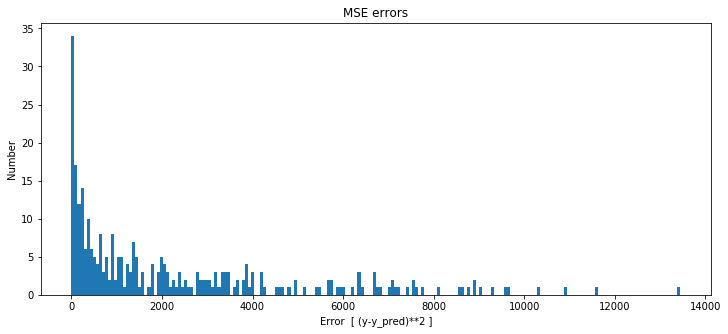

On test
MAE:	47.3756369501
MSE:	3096.03015101
R2 :	0.417024184822


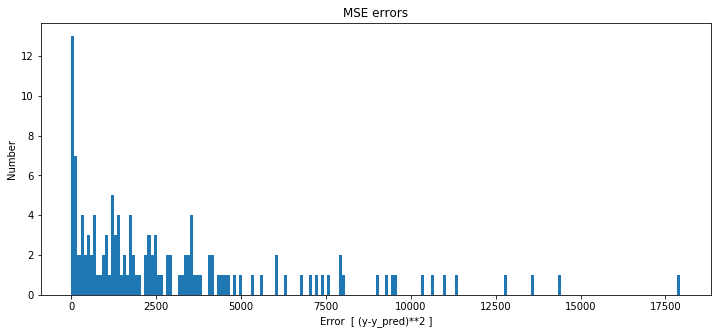

On test
MAE:	46.7785946871
MSE:	3101.90308584
R2 :	0.415918323833


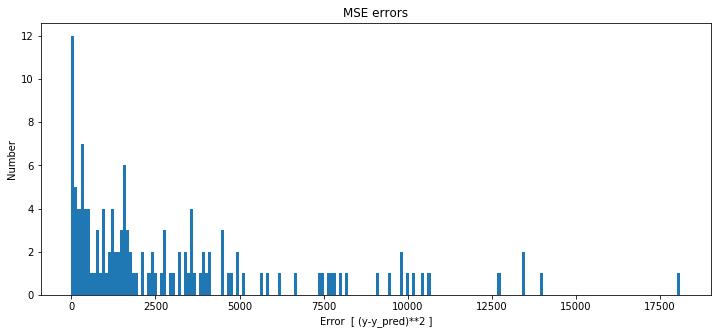

In [10]:
X_new = X_train[(y_pred-y_train)**2<=12000]
y_new = y_train[(y_pred-y_train)**2<=12000]

from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(Ridge(alpha = 0.001), X_new, y_new, cv = 5)

print("MAE:\t"+str(mean_absolute_error(y_predict, y_new)))
print("MSE:\t"+str(mean_squared_error(y_predict, y_new)))
print("R2 :\t"+str(r2_score(y_new, y_predict)))

plt.figure(figsize = (12,5))

plt.title("MSE errors")
plt.ylabel("Number")
plt.xlabel("Error  [ (y-y_pred)**2 ]")
plt.hist((y_new[::1]-y_predict)**2, bins = 200)
plt.show()

print("On test")
y_predict = Ridge(alpha = 0.1).fit(X_train, y_train).predict(X_val)

print("MAE:\t"+str(mean_absolute_error(y_predict, y_val)))
print("MSE:\t"+str(mean_squared_error(y_predict, y_val)))
print("R2 :\t"+str(r2_score(y_val, y_predict)))

plt.figure(figsize = (12,5))

plt.title("MSE errors")
plt.ylabel("Number")
plt.xlabel("Error  [ (y-y_pred)**2 ]")
plt.hist((y_val-y_predict)**2, bins = 200)
plt.show()

print("On test")
y_predict = Ridge(alpha = 0.1).fit(X_new, y_new).predict(X_val)

print("MAE:\t"+str(mean_absolute_error(y_predict, y_val)))
print("MSE:\t"+str(mean_squared_error(y_predict, y_val)))
print("R2 :\t"+str(r2_score(y_val, y_predict)))

plt.figure(figsize = (12,5))

plt.title("MSE errors")
plt.ylabel("Number")
plt.xlabel("Error  [ (y-y_pred)**2 ]")
plt.hist((y_val-y_predict)**2, bins = 200)
plt.show()

In [11]:
# Your code here
# ...
#


## Часть 2. Логистическая регрессия

В этой части мы будем реализовывать один из самых простых бинарных классификаторов — логистическую регрессию и её обучение с помощью обычного (полного) и стохастического градиентных спусков.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). В случае стохастического градиентного спуска $\nabla_w Q(w, X) \approx \nabla_w q_{i_k} (w)$, где $i_k$ — случайно выбранный номер слагаемого из функционала (регуляризатор можно внести в сумму, предварительно умножив и разделив на $l$). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Формулу для градиента функции потерь логистической регрессии вы должны были выводить в рамках одной из задач четвёртого теоретического домашнего задания. Но на всякий случай мы её повторим. Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Вероятность принадлежности объекта $x$ классу $+1$ вычисляется следующим образом:

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- \langle w, x \rangle )}
$$

Не забывайте, что матрицу объекты-признаки $X$ необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из 2 способов, разобранных на лекциях). Для этого можно воспользоваться StandardScaler или сделать это вручную.

В логистической регрессии также можно использовать $L_1$-регуляризацию. Тогда в функцию потерь добавится слагаемое $\lambda_1 \lVert w \rVert _1$. В формуле для вычисления градиента фукнции потерь по вектору коэффициентов это слагаемое будет соответствовать $\lambda_1 sgn(w)$, где $sgn$ — вычисление знака числа, применяемое к вектору коэффициентов поэлементо.

__Задание 1.__ Реализация обучения и применения логистической регресии c $L_2$-регуляризацией. 

**(2.5 балла)**

Используйте для этого указанные ниже прототипы. Для эффективности все вычисления производите в векторизованной форме без циклов (кроме самих итераций градиентного спуска). Сгенерируйте с помощью функции make\_classification из модуля sklearn.datasets небольшую выборку для тестирования и исследования (выборка не должна быть слишком простой для классификации; также не забудьте проверить, что метки объектов из необходимого нам множества). Постройте следующие графики (для полного и стохастического градиентного спуска на одном графике):
- функции потерь от номера итерации обучения
- затраченного времени от номера итерации обучения

Возьмите параметр регуляризации $\lambda_2=1$, точность $tolerance=10^{-6}$, максимальное число итераций $max\_iter=1000$. Подберите оптимальную на ваш взгляд величину шага градиентного спуска. 

Сделайте выводы о том, чем различается на практике обучение с помощью стохастического градиентного спуска по сравнению с полным градиентным спуском.

В этом задании не обращайте внимания на $\lambda_1$, соответствующий $L_1$-регуляризации.

Для численной устойчивости вам могут быть полезны функции: scipy.special.expit и numpy.logaddexp.

__Важно:__ код с реализацией логистической регрессии необходимо также отправить на проверку в Яндекс.контест (ссылка [раз](https://official.contest.yandex.ru/contest/5704/problems/) и [альтернативная](https://contest.yandex.ru/contest/5704/problems/)). Не забывайте про pep8. 

ID посылки: https://contest.yandex.ru/contest/5704/run-report/6751638/

In [12]:
from sklearn.base import BaseEstimator
import numpy as np
from scipy.special import expit as sigmoid
from tqdm import tqdm

class LogReg(BaseEstimator):
    def __predict__(self, X):
        return 1/(1+np.exp(X.dot(w)))

    def __loss__(self, X, y):
        return np.mean(np.log(1 + np.exp(-y * (X.dot(self.w))))) + \
                self.lambda_2*np.sum(self.w * self.w)

    def __init__(self, lambda_1=0.01, lambda_2=1.0, gd_type='full',
                 tolerance=1e-4, max_iter=10, w0=None, alpha=1e-3,
                 verbose=True, batch_size=12):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance if tolerance is not None else -1
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.loss_history = None
        self.verbose = verbose
        self.batch_size = batch_size

        if gd_type == 'full':
            self.__grad__ = self.calc_gradient
            self.__loss__ = self.calc_loss
        elif gd_type == 'stochastic':
            self.__grad__ = self.calc_gradient_stohastic
            self.__loss__ = self.calc_loss
        elif gd_type == 'stochastic_loss':
            self.__grad__ = self.calc_gradient_stohastic
            self.__loss__ = self.calc_loss_stohastic

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if self.w0 is not None:
            self.w = self.w0
        else:
            self.w = np.zeros(X.shape[1])

        last_loss = 0
        epoch_iterator = tqdm(range(self.max_iter)) if self.verbose else range(self.max_iter)
        for epoch in epoch_iterator:
            self.w -= self.alpha * self.__grad__(X, y)
            current_loss = self.__loss__(X, y)
            self.loss_history.append(current_loss)
            if np.abs(current_loss-last_loss) <= self.tolerance:
                if self.verbose:
                    sys.stderr.write("Finish on %d iterasion" % epoch)
                return self
            last_loss = current_loss

        return self

    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        return np.array([[1.0-p, p] for p in sigmoid(X.dot(self.w))])
    
    def predict(self, X):
        return np.array([np.argmax(i)*2-1 for i in self.predict_proba(X)])
    
    def calc_gradient_stohastic(self, X, y):
        batch = np.random.choice(X.shape[0], size=self.batch_size)
        # PEP8 :( i don't know how to break math lines
        a, b = X[batch,:], y[batch]
        return a.T.dot(-1.0 / (1.0 + 
            np.exp(b * a.dot(self.w))) * b) / \
            b.shape[0] + \
            self.lambda_2*self.w

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        """ Not np realization
        dw = np.zeros(X.shape[1])
        for yi, x in zip(y,X):
            dw+=-yi*x/(1.0+math.exp(yi*np.dot(self.w,x)))
        return dw+self.lambda_2*self.w
        """

        return X.T.dot(-1.0 / (1.0 + np.exp(y * X.dot(self.w))) * y) / \
            y.shape[0] + self.lambda_2*self.w

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        """ Not np realization
        ress = 0
        for yi, x in zip(y,X):
            ress+=math.log(1+math.exp(-yi*np.dot(self.w,x)))
        return ress+alpha2/2.0*np.dot(self.w,self.w)
        """
        return np.mean(np.log(1+np.exp(-y*(X.dot(self.w))))) + \
            self.lambda_2/2.0*np.dot(self.w, self.w)

    def calc_loss_stohastic(self, X, y):
        batch = np.random.choice(X.shape[0], size=self.batch_size)
        X_batch, y_batch = X[batch,:], y[batch]
        return np.mean(np.log(1+np.exp(-y_batch*(X_batch.dot(self.w))))) + \
            self.lambda_2/2.0*np.dot(self.w, self.w)




### Тест работоспособности

In [13]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=30, n_redundant=10, n_informative=10,
                           n_classes=2, n_clusters_per_class=3)
y = y*2-1

 22%|██▏       | 2154/10000 [00:01<00:05, 1355.43it/s]Finish on 2241 iterasion


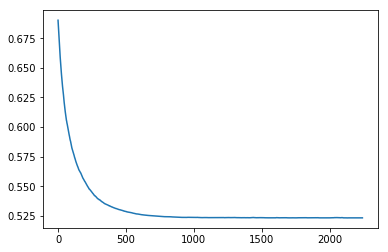

In [14]:
model = LogReg(lambda_1=0, lambda_2=1, gd_type='stochastic', 
                 tolerance=1e-8, max_iter=10000, w0=None, alpha=1e-3, batch_size = 50)
model.fit(X,y)
y_p_my = model.predict_proba(X)
plt.plot(model.loss_history)
plt.show()

### Функция потерь от номера итерации обучения
1. функция потерь считается на всей  выборки
2. функция потерь считается на batch_size выборки

100%|██████████| 10000/10000 [00:15<00:00, 663.00it/s]


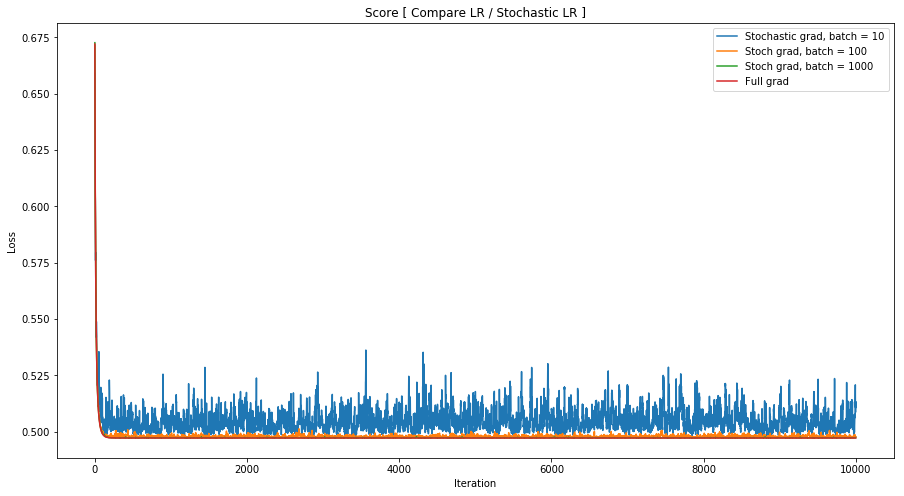

In [15]:
model_stoch10 = LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic', 
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2, batch_size = 10
              )
model_stoch10.fit(X,y)

model_stoch100 = LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic', 
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2, batch_size = 100
              )
model_stoch100.fit(X,y)

model_stoch1000 = LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic', 
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2, batch_size = 1000
              )
model_stoch1000.fit(X,y)

model_full = LogReg(lambda_1=0, lambda_2=0.5, gd_type='full', 
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2
              )
model_full.fit(X,y)

plt.figure(figsize = (15,8))
plt.title("Score [ Compare LR / Stochastic LR ]")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(model_stoch10.loss_history, label = "Stochastic grad, batch = 10")
plt.plot(model_stoch100.loss_history, label = "Stoch grad, batch = 100")
plt.plot(model_stoch1000.loss_history, label = "Stoch grad, batch = 1000")
plt.plot(model_full.loss_history, label = "Full grad")

plt.legend()
plt.show()

In [16]:
from tqdm import tqdm

100%|██████████| 10000/10000 [00:12<00:00, 797.88it/s]


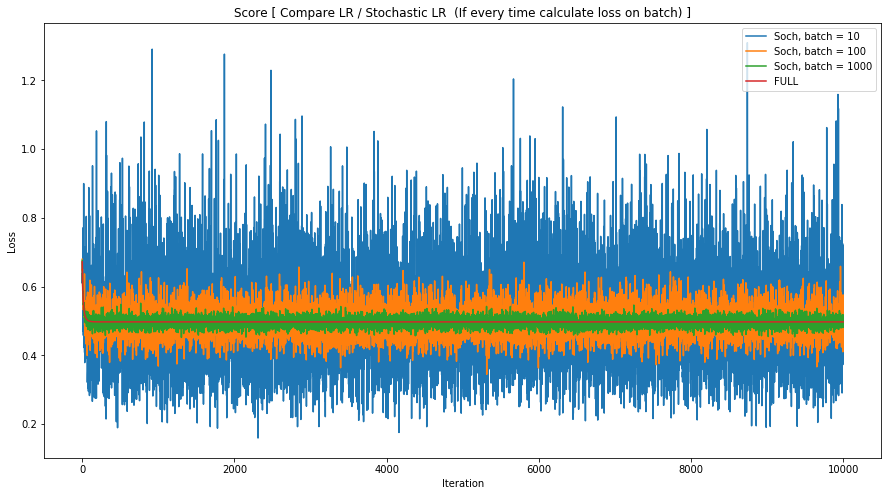

In [17]:
model_stoch10 = LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic_loss',
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2, batch_size = 10
              )
model_stoch10.fit(X,y)

model_stoch100 = LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic_loss',
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2, batch_size = 100
              )
model_stoch100.fit(X,y)

model_stoch1000 = LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic_loss',
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2, batch_size = 1000
              )
model_stoch1000.fit(X,y)

model_full = LogReg(lambda_1=0, lambda_2=0.5, gd_type='full',
               tolerance=-1e-9, max_iter=10000, 
               w0=None, alpha=1e-2
              )
model_full.fit(X,y)

plt.figure(figsize = (15,8))
plt.title("Score [ Compare LR / Stochastic LR  (If every time calculate loss on batch) ]")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(model_stoch10.loss_history, label = "Soch, batch = 10")
plt.plot(model_stoch100.loss_history, label = "Soch, batch = 100")
plt.plot(model_stoch1000.loss_history, label = "Soch, batch = 1000")
plt.plot(model_full.loss_history, label = "FULL")

plt.legend()
plt.show()

### Разница в скорости (stohastic и full)

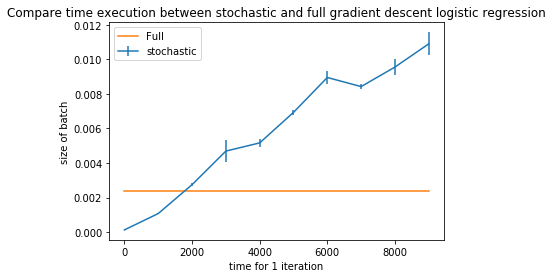

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=100, n_redundant=10, n_informative=10,
                           n_classes=2, n_clusters_per_class=3)
y = y*2-1

res_mean = {}
res_std  = {}

for batch_size in tqdm(range(1,10001,1000)):
    tmp = %timeit -o -q -n 1 -r 3 LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic_loss', batch_size=batch_size, verbose = False, tolerance=None, max_iter=1000, alpha=1e-3).fit(X, y)
    res_mean[batch_size] = tmp.average / 1000.0
    res_std[batch_size] = tmp.stdev / 1000.0
    
tmp = %timeit -o -q -n 1 -r 3 LogReg(lambda_1=0, lambda_2=0.5, gd_type='full', verbose = False, tolerance=None, max_iter=1000, alpha=1e-3).fit(X, y)
res_full = tmp.average / 1000.0

plt.title("Compare time execution between stochastic and full gradient descent logistic regression")
plt.xlabel('time for 1 iteration')
plt.ylabel('size of batch')
plt.errorbar(res_mean.keys(), res_mean.values(), yerr = res_std.values(), label = "stochastic")
plt.plot(res_mean.keys(), [res_full for i in res_mean.keys()], label = "Full")
plt.legend()
plt.show()

##### Видно, что операция взятия батча из выборки занимает весомое время   ( X_new = X[batch] ) сравнимое, с опрацией перемножения матриц
это можно проверить, запустив 

>%prun LogReg(lambda_1=0, lambda_2=0.5, gd_type='stochastic_loss', batch_size=1000, verbose = False, tolerance=None, max_iter=1000, alpha=1e-3).fit(X, y))

### Еще одно подзадание
Возьмите параметр регуляризации  λ2=1
 , точность  tolerance=10−6
 , максимальное число итераций  max_iter=1000
 . Подберите оптимальную на ваш взгляд величину шага градиентного спуска.


In [148]:
from sklearn.metrics import accuracy_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
results_train = {'accuracy':[],'f1':[],'loss':[]}
results_test  = {'accuracy':[],'f1':[],'loss':[]}
alpha_params = [10**i for i in np.linspace(-4,0.4,num = 300)]
for alpha in tqdm(alpha_params):
    model = LogReg(lambda_2=1.0, max_iter=1000, alpha = alpha, gd_type='full', tolerance = 1e-6, verbose = False)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    results_test[ 'accuracy'].append(accuracy_score(y_test, y_predict_test))
    results_train['accuracy'].append(accuracy_score(y_train, y_predict_train))

    results_test[ 'f1'].append(f1_score(y_test, y_predict_test))
    results_train['f1'].append(f1_score(y_train, y_predict_train))

    results_test[ 'loss'].append(model.calc_loss(X_test, y_test))
    results_train['loss'].append(model.calc_loss(X_train, y_train))


 97%|█████████▋| 290/300 [05:12<00:16,  1.68s/it]/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 300/300 [05:29<00:00,  1.75s/it]


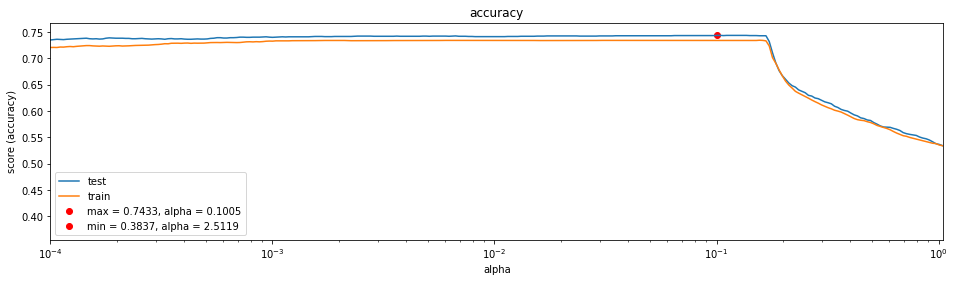

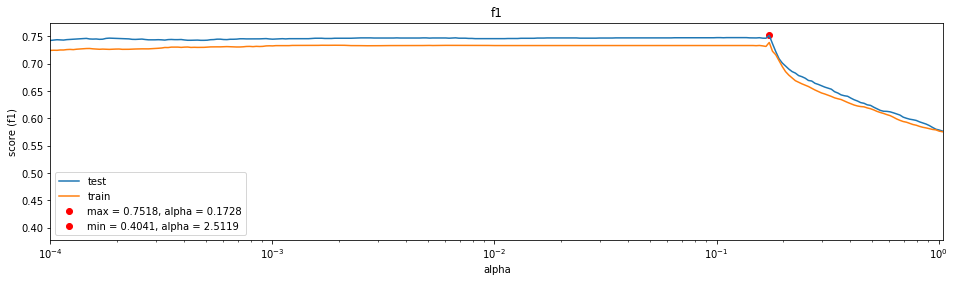

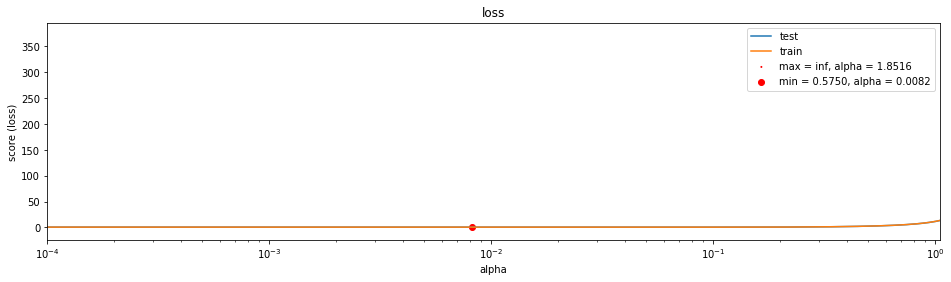

In [151]:
for key in results_train.keys():
    plt.figure(figsize(16,4))
    plt.title(key)
    plt.xlabel("alpha")
    plt.xscale('log')
    plt.xlim(1e-4, 1.05)
    plt.ylabel("score ("+str(key)+")")
    lst = results_test[key]
    plt.plot(alpha_params, results_test[key], label = "test")
    plt.plot(alpha_params, results_train[key], label = "train")

    a_max = alpha_params[np.argmax(results_test[key])]
    plt.scatter(a_max, np.max(results_test[key]), color = "red",
        label = ("max = %2.4f, alpha = %2.4f"%(max(results_test[key]), a_max)))
    a_min = alpha_params[np.argmin(results_test[key])]
    plt.scatter(a_min, np.min(results_test[key]), color = "red",
                label = ("min = %2.4f, alpha = %2.4f"%(min(results_test[key]), a_min)))
    plt.legend()
    plt.show()

$$Лучшый\ шаг\ при\ \ a \in [0.005, 0.2]$$ 
$$( Accuracy\ \ a = 0.1,\ f1\ a = 0.172,\ Loss\ a = 0.0082)$$ 

### Вывод

1. Шаг градиентного спуска хорошо работает при a < 0.2 (Хотя в у Воронцова написано при а<0.1)
2. Стохастический градиентный спуск берет подвыборку от выборки, это долго если использовать стандартные методы numpy

__Бонусное задание.__ Реализация $L_1$-регуляризации и обучение с помощью субградиентного спуска.

__(1.0 балла)__

Модифицируйте реализацию так, чтобы можно было обучать логистическиую регрессию с $L_1$-регуляризацией (и даже одновременно с двумя видами). Проведите аналогичные эксперименты, считая $\lambda_1 = 0.001, \lambda_2 = 0$.

Стоит помнить, что модуль — недифференцируемая в нуле функция, поэтому мы не можем применить обычный градиентный спуск. Вместо этого будем применить субградиентный спуск — аналогичный градиентному спуску метод, в котором используется субградиент функции. 

Вектор $g \in \mathbb{R}$ называется субградиентом выпуклой функции $f$ в точке $x$, если $\forall z \in \mathbb{R}$ выполнено неравенство: $f(z) \ge f(x) + g^T (z-x)$. Если функция $f$ дифференцируема в точке $x$, её субградиент в этой точке совпадает с градиентом. Субдифференциалом функции $f$ называют множество субградиентов в этой точке.

Для $f(x) = |x|$ при $x = 0$ субдифференциал определяется неравенством $|z| \ge gz$, поэтому $g \in [-1, 1]$. 

На практике для стабильности процесса обучения для близких к нулю значений можно уменьшать градиент, умножая на небольшое число (например, 0.1-0.5) или делая его нулевым (только околонулевые координаты!)

In [311]:
from sklearn.base import BaseEstimator
import numpy as np
from scipy.special import expit as sigmoid
from tqdm import tqdm

class LogReg(BaseEstimator):
    def __predict__(self, X):
        return 1/(1+np.exp(X.dot(w)))

    def __loss__(self, X, y):
        return np.mean(np.log(1 + np.exp(-y * (X.dot(self.w))))) + \
                self.lambda_2*np.sum(self.w * self.w)

    def __init__(self, lambda_1=0.01, lambda_2=1.0, gd_type='full',
                 tolerance=1e-4, max_iter=10, w0=None, alpha=1e-3,
                 verbose=True, batch_size=12):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance if tolerance is not None else -1
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.loss_history = None
        self.verbose = verbose
        self.batch_size = batch_size

        if gd_type == 'full':
            self.__grad__ = self.calc_gradient
            self.__loss__ = self.calc_loss
        elif gd_type == 'stochastic':
            self.__grad__ = self.calc_gradient_stohastic
            self.__loss__ = self.calc_loss
        elif gd_type == 'stochastic_loss':
            self.__grad__ = self.calc_gradient_stohastic
            self.__loss__ = self.calc_loss_stohastic

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if self.w0 is not None:
            self.w = self.w0
        else:
            self.w = np.zeros(X.shape[1])

        last_loss = 0
        epoch_iterator = tqdm(range(self.max_iter)) if self.verbose else range(self.max_iter)
        for epoch in epoch_iterator:
            self.w -= self.alpha * self.__grad__(X, y)
            current_loss = self.__loss__(X, y)
            self.loss_history.append(current_loss)
            if np.abs(current_loss-last_loss) <= self.tolerance:
                if self.verbose:
                    sys.stderr.write("Finish on %d iterasion" % epoch)
                return self
            last_loss = current_loss

        return self

    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        return np.array([[1.0-p, p] for p in sigmoid(X.dot(self.w))])
    
    def predict(self, X):
        return np.array([np.argmax(i)*2-1 for i in self.predict_proba(X)])
    
    def calc_gradient_stohastic(self, X, y):
        batch = sorted(np.random.choice(X.shape[0], size=self.batch_size))
        # PEP8 :( i don't know how to break math lines
        a, b = X[batch], y[batch]
        return a.T.dot(-1.0 / (1.0 + 
            np.exp(b * a.dot(self.w))) * b) / \
            b.shape[0] + \
            self.lambda_2*self.w + \
            self.lambda_1*np.sign(self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        """ Not np realization
        dw = np.zeros(X.shape[1])
        for yi, x in zip(y,X):
            dw+=-yi*x/(1.0+math.exp(yi*np.dot(self.w,x)))
        return dw+self.lambda_2*self.w
        """

        return X.T.dot(-1.0 / (1.0 + np.exp(y * X.dot(self.w))) * y) / \
            y.shape[0] +\
            self.lambda_2*self.w +\
            self.lambda_1*np.sign(self.w)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        """ Not np realization
        ress = 0
        for yi, x in zip(y,X):
            ress+=math.log(1+math.exp(-yi*np.dot(self.w,x)))
        return ress+alpha2/2.0*np.dot(self.w,self.w)
        """
        return np.mean(np.log(1+np.exp(-y*(X.dot(self.w))))) + \
            self.lambda_2/2.0*np.dot(self.w, self.w) + \
            self.lambda_1*np.abs(self.w).sum()

    def calc_loss_stohastic(self, X, y):
        batch = sorted(np.random.choice(X.shape[0], size=self.batch_size))
        X_batch, y_batch = X[batch], y[batch]
        return np.mean(np.log(1+np.exp(-y_batch*(X_batch.dot(self.w))))) + \
            self.lambda_2/2.0*np.dot(self.w, self.w) + \
            self.lambda_1*np.abs(self.w).sum()





### Проверка работоспособности

In [312]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, n_informative=10,
                           n_classes=2, n_clusters_per_class=5)
y = y*2-1

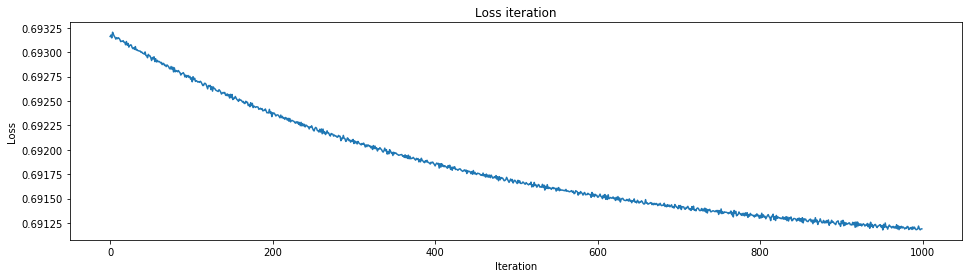

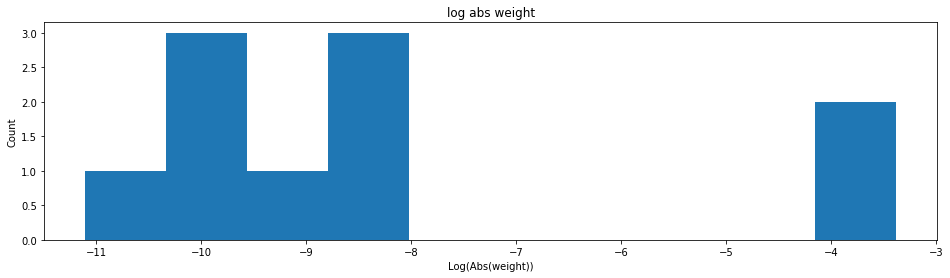

In [313]:
model = LogReg(lambda_1=0.15, lambda_2=0.03, gd_type='full', 
                tolerance=1e-9, max_iter=1000, 
                alpha=1e-3, verbose = False
                )
plt.title("Loss iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
model.fit(X,y)
plt.plot(model.loss_history)
plt.show()
plt.title("log abs weight")
plt.xlabel("Log(Abs(weight))")
plt.ylabel("Count")
plt.hist(np.log(np.abs(model.w)))
plt.show()

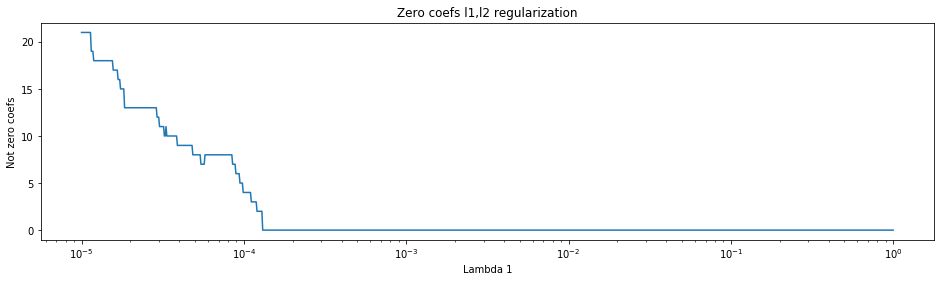

In [317]:
alpha_params = [10**i for i in np.linspace(-5, 0, num = 1000)]
res = []

for lambda_1 in tqdm(alpha_params):
    model = LogReg(lambda_1=lambda_1, lambda_2=0, gd_type='full', 
                   tolerance=1e-9, max_iter=100, 
                   alpha=1e-3, verbose = False
                  )
    model.fit(X,y)
    res.append(len(list(filter(lambda x:x>=1e-5, np.abs(model.w)))))
    
plt.title('Zero coefs l1,l2 regularization')
plt.xscale('log')
plt.xlabel('Lambda 1')
plt.ylabel('Not zero coefs')
plt.plot(alpha_params, res)
plt.show()

In [212]:
from sklearn.metrics import accuracy_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
results_train = {'accuracy':[],'f1':[],'loss':[]}
results_test  = {'accuracy':[],'f1':[],'loss':[]}
alpha_params = [10**i for i in np.linspace(-4,0.4,num = 300)]
for alpha in tqdm(alpha_params):
    model = LogReg(lambda_1 = 0.001, lambda_2=0.0, max_iter=1000, alpha = alpha, gd_type='full', tolerance = 1e-6, verbose = False)
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)
    results_test[ 'accuracy'].append(accuracy_score(y_test, y_predict_test))
    results_train['accuracy'].append(accuracy_score(y_train, y_predict_train))

    results_test[ 'f1'].append(f1_score(y_test, y_predict_test))
    results_train['f1'].append(f1_score(y_train, y_predict_train))

    results_test[ 'loss'].append(model.calc_loss(X_test, y_test))
    results_train['loss'].append(model.calc_loss(X_train, y_train))



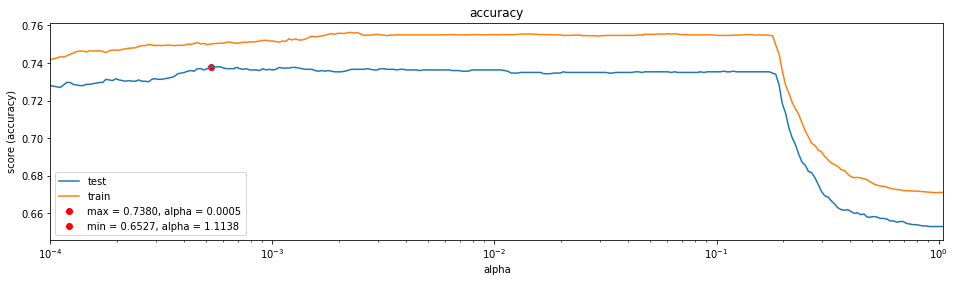

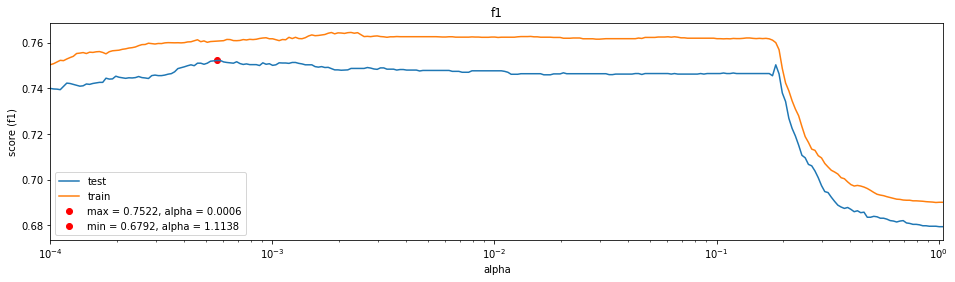

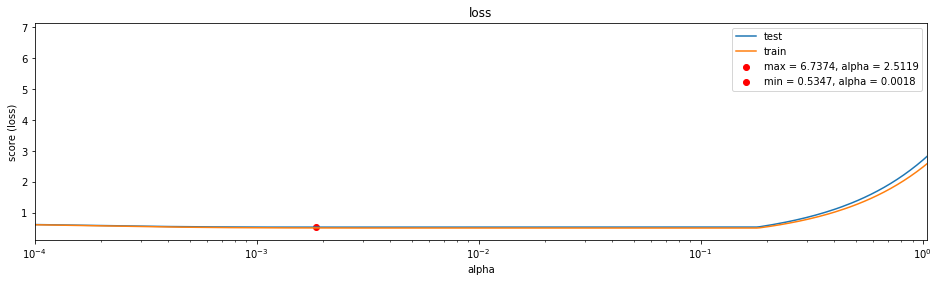

In [210]:
for key in results_train.keys():
    plt.figure(figsize(16,4))
    plt.title(key)
    plt.xlabel("alpha")
    plt.xscale('log')
    plt.xlim(1e-4, 1.05)
    plt.ylabel("score ("+str(key)+")")
    lst = results_test[key]
    plt.plot(alpha_params, results_test[key], label = "test")
    plt.plot(alpha_params, results_train[key], label = "train")

    a_max = alpha_params[np.argmax(results_test[key])]
    plt.scatter(a_max, np.max(results_test[key]), color = "red",
        label = ("max = %2.4f, alpha = %2.4f"%(max(results_test[key]), a_max)))
    a_min = alpha_params[np.argmin(results_test[key])]
    plt.scatter(a_min, np.min(results_test[key]), color = "red",
                label = ("min = %2.4f, alpha = %2.4f"%(min(results_test[key]), a_min)))
    plt.legend()
    plt.show()

$$Лучшый\ шаг\ при\ \ a \in [0.0003, 0.003]$$ 
$$( Accuracy\ \ a = 0.0005,\ f1\ a = 0.0006,\ Loss\ a = 0.0018)$$ 

__Выводы:__ ...

__Задание 2.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(1 балл)**

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

Загрузим данные с актуального сейчас конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [209]:
data = pd.read_csv('dataset/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [320]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Не забудьте отнормировать признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [324]:
# Your code here
# ...
for key in data:
    data[key] = (data[key] - data[key].mean())/data[key].std()
target = target*2-1
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [532]:
# Your code here
# ...
model = LogReg(lambda_1=0, lambda_2=1e-4, max_iter=200, 
               alpha = 1e-2, gd_type='full',
               tolerance = 1e-9, verbose = False)

model.fit(X_train.get_values(), y_train)
y_predict_test = [i[1] for i in model.predict_proba(X_test)]

y_predicted = [i[1] for i in model.predict_proba(X_test)]
print("My prediction :      %2.4f\t" % roc_auc_score(y_test,y_predict_test))

from sklearn.linear_model import LogisticRegression
model_sklearn = LogisticRegression(C = 1e4/2, 
                                   fit_intercept=False, 
                                   max_iter = 100,
                                   solver = 'lbfgs')

model_sklearn.fit(X_train, y_train)
y_predicted_sk = [i[1] for i in model_sklearn.predict_proba(X_test)]
print("Sklearn prediction : %2.4f\t" % roc_auc_score(y_test,y_predicted_sk))


My prediction :      0.6211	
Sklearn prediction : 0.6250	


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

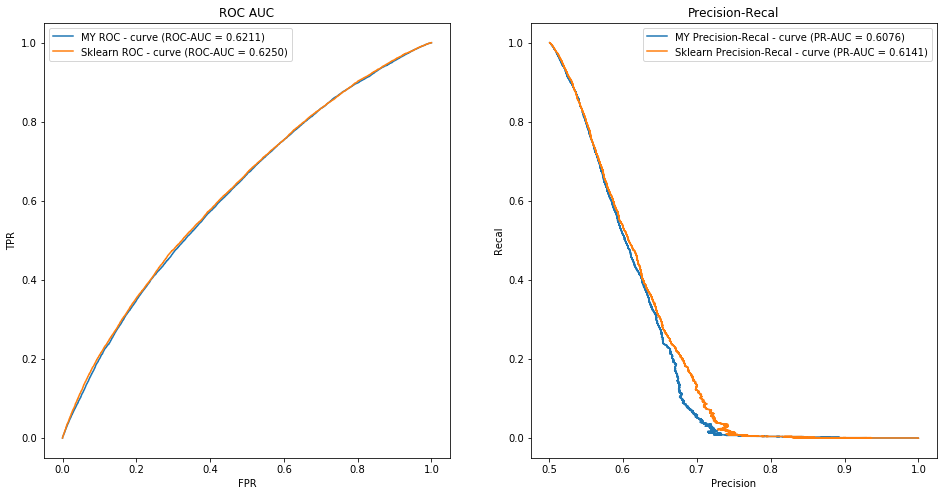

In [577]:
# Your code here
# ...
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)

fpr, tpr, _ = roc_curve(y_test, y_predicted)
ax1.plot(fpr, tpr,
         label = 'MY ROC - curve (ROC-AUC = %4.4f)' % roc_auc_score(y_test,y_predicted))

fpr, tpr, _ = roc_curve(y_test, y_predicted_sk)
ax1.plot(fpr, tpr,
         label = 'Sklearn ROC - curve (ROC-AUC = %4.4f)' % roc_auc_score(y_test,y_predicted_sk))

ax1.set_title("ROC AUC")
ax1.set_xlabel('FPR')
ax1.set_ylabel("TPR")
ax1.legend()

fpr, tpr, _ = precision_recall_curve(y_test, y_predicted)
ax2.plot(fpr, tpr,
         label = 'MY Precision-Recal - curve (PR-AUC = %4.4f)' % average_precision_score(y_test,y_predicted))

fpr, tpr, _ = precision_recall_curve(y_test, y_predicted_sk)
ax2.plot(fpr, tpr,
         label = 'Sklearn Precision-Recal - curve (PR-AUC = %4.4f)' % average_precision_score(y_test,y_predicted_sk))

ax2.set_title("Precision-Recal")
ax2.set_xlabel('Precision')
ax2.set_ylabel("Recal")
ax2.legend()

plt.show()

>Sklearn работает лучше, предположительно из за выбора шага (shrinkage)

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

| a\Y | 1 | -1 |
|------------|
|   1 | TP| FP|
|   -1| FN| TN|

$$ recal(полнота) = \frac{TP}{TP+FN}  $$ 

$$ precision(точность) = \frac{TP}{TP+FP}  $$ 

Для полноты($recal$) 0.7,  точность($precision$) будет примерно 0.56 (из графика)

Найдем порог


In [634]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

t = 0.4685
y_p = [int(i[1]>t)*2-1 for i in model.predict_proba(X_test)]
print("Порог бинаризации: \t%4.4f"%t)
print("recall score\t\t%4.4f"%recall_score(y_test, y_p))
print("precision score\t\t%4.4f"%precision_score(y_test, y_p))
print("accuracy score\t\t%4.4f"%accuracy_score(y_test, y_p))

M = confusion_matrix(y_test, y_p)/len(y_test)
print('\n\t\t\t\t  Confusion matrix')
print('\t\t\t\t|-----|--------------|')
print("\t\t\t\t|y_p\y|  1    | -1   |")
print('\t\t\t\t|-----|--------------|')
print("\t\t\t\t|  1  | %4.4f|%4.4f|"%(M[0][0], M[0][1]))
print('\t\t\t\t|-----|--------------|')
print("\t\t\t\t| -1  | %4.4f|%4.4f|"%(M[1][0], M[1][1]))
print('\t\t\t\t|-----|--------------|')


Порог бинаризации: 	0.4685
recall score		0.7010
precision score		0.5669
accuracy score		0.5820

				  Confusion matrix
				|-----|--------------|
				|y_p\y|  1    | -1   |
				|-----|--------------|
				|  1  | 0.2309|0.2682|
				|-----|--------------|
				| -1  | 0.1498|0.3511|
				|-----|--------------|


#### Выводы
1. Ошибок первого рода почти в два раза меньше, чем ошибок второго рода
2. Полный классификатор "рассматривает почти все 1"  но платит за это низкой точностью.

###### От себя, мне кажется прикольный пример доставшийся мне отца
Есть теория, что девушка за первые 3 секунды делает решение про то, что будет ли у вас хоть что-то.

Если классификатор это мальчик, то существует два варианта поведения при общения с девушками.

Ты можешь либо действовать, либо забить. (Проявляешь знаки внимания\Забиваешь)

В свою очередь ты либо нравишься, либо нет.(1 - Прошел фейс контроль\0 - Не прошел)

| Реакция \ Дествия | 1 (Действовать) | 0 (Забить) |
|---------------------------|
|   1 (Она согласна) | Горизональное положение| Я идиот |
|   0 (Она несогласна)| Послали| Збс, я адекват |

Есть две тактики:

"Мачо"   : если ты уверен что переспишь  - действуй

"Задрот" : если видишь девушку           - действуй

Так вот стиль "мачо" это почти всегда ничего не делать, только если прямо учень уверен (почти всегда 0).

(Высокая точность, низкая полнота)

"Задрот" это почти всегда делать, если (почти всегда 1).

(низкая точность, высокая полнота)

##### Так вот, этот классификатор скорее всего "задрот"

__Задание 3.__ Изучение влияния регуляризатора на процесс обучения

__(0.5 балла)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, запускайте процесс обучения логистической регрессии с параметром $max\_iter=1$ и $w^{(0)}$, полученным на предыдущей итерации. Постройте два графика: на одном из них логистическая регрессия с коэффициентом регуляризации, равным 0, а на другом с некоторым разумным значением. На каждом графике одновременно должна быть и функция потерь для обучающей, и для тестовой выборки. Не забудьте сделать одинаковыми оси обоих графиков. Какие выводы вы можете сделать?

In [ ]:
# Your code here
# ...


## Часть 3. Метод опорных векторов и калибровка вероятностней

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов (в этот раз воспользуйтесь готовой реализацией LinearSVC из sklearn). Используйте уже загруженные и обработанные в предыдущей части данные.

In [638]:
# Your code here
# ...
from sklearn.svm import LinearSVC

model = LinearSVC(random_state = 42)
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

На той же тестовой части посчитайте все те же метрики. Что вы можете сказать о полученных результатах?

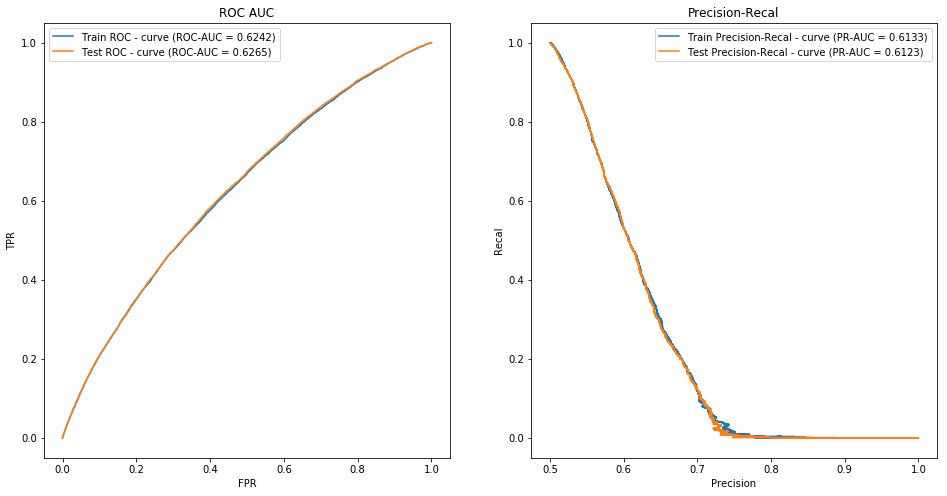

			Train 
recall score		0.5464
precision score		0.5961
accuracy score		0.5874

				  Confusion matrix
				|-----|--------------|
				|y_p\y|  1    | -1   |
				|-----|--------------|
				|  1  | 0.3137|0.1854|
				|-----|--------------|
				| -1  | 0.2272|0.2737|
				|-----|--------------|
			Test 
recall score		0.5488
precision score		0.5971
accuracy score		0.5899

				  Confusion matrix
				|-----|--------------|
				|y_p\y|  1    | -1   |
				|-----|--------------|
				|  1  | 0.3160|0.1849|
				|-----|--------------|
				| -1  | 0.2252|0.2739|
				|-----|--------------|


In [659]:
# Your code here
# ...
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score


y_predicted_test = model.decision_function(X_test)
y_predicted_train = model.decision_function(X_train)
names = ['Train ','Test ']
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)

for c, (y_predicted, y_current) in enumerate(
    zip([y_predicted_test, y_predicted_train],[y_test, y_train])
    ):


    fpr, tpr, _ = roc_curve(y_current, y_predicted)
    ax1.plot(fpr, tpr,
             label = str(names[c])+'ROC - curve (ROC-AUC = %4.4f)' % roc_auc_score(y_current,y_predicted))

    ax1.set_title("ROC AUC")
    ax1.set_xlabel('FPR')
    ax1.set_ylabel("TPR")
    ax1.legend()

    fpr, tpr, _ = precision_recall_curve(y_current, y_predicted)
    ax2.plot(fpr, tpr,
             label = str(names[c])+'Precision-Recal - curve (PR-AUC = %4.4f)' % average_precision_score(y_current,y_predicted))

    ax2.set_title("Precision-Recal")
    ax2.set_xlabel('Precision')
    ax2.set_ylabel("Recal")

    ax2.legend()
plt.show()
for c, (y_predicted, y_current) in enumerate(
    zip([y_predicted_test, y_predicted_train],[y_test, y_train])
    ):
    print('\t\t\t'+str(names[c]))
    y_p = np.array([int(i>0.0) for i in y_predicted])*2-1
    print("recall score\t\t%4.4f"%recall_score(y_current, y_p))
    print("precision score\t\t%4.4f"%precision_score(y_current, y_p))
    print("accuracy score\t\t%4.4f"%accuracy_score(y_current, y_p))

    M = confusion_matrix(y_current, y_p)/len(y_current)
    print('\n\t\t\t\t  Confusion matrix')
    print('\t\t\t\t|-----|--------------|')
    print("\t\t\t\t|y_p\y|  1    | -1   |")
    print('\t\t\t\t|-----|--------------|')
    print("\t\t\t\t|  1  | %4.4f|%4.4f|"%(M[0][0], M[0][1]))
    print('\t\t\t\t|-----|--------------|')
    print("\t\t\t\t| -1  | %4.4f|%4.4f|"%(M[1][0], M[1][1]))
    print('\t\t\t\t|-----|--------------|')


##### Вывод:
1. Модель простая, переобучения нет
2. Нет особой разницы между логистической регрессией и SVM 

Описание моделей:

SVM: Try to maximize the margin between the closest support vectors

LR: Maximize the posterior class probability

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов с линейным ядром. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром, так как только в нём есть информация об опорных векторах.

Automatically created module for IPython interactive environment


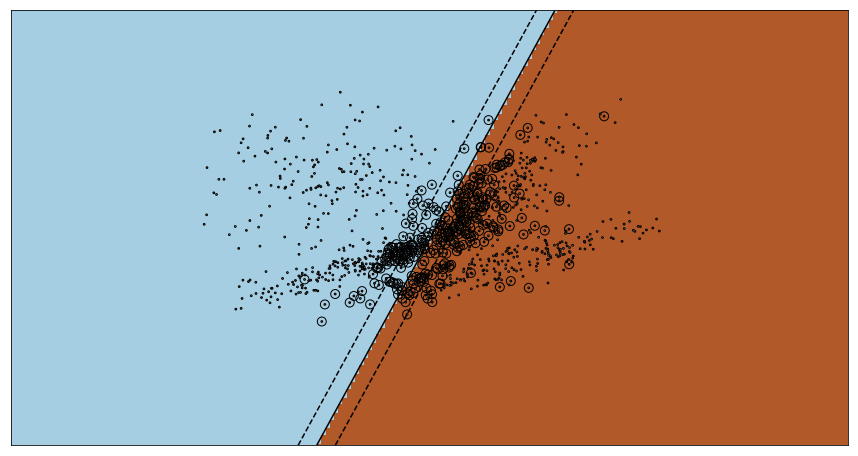

In [708]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_classes=2, n_clusters_per_class=2)
# figure number
fignum = 1

# fit the model
kernel = 'linear'
clf = svm.SVC(kernel=kernel, gamma=2)
clf.fit(X, y)

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(15, 8))
plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k', s = 3)

plt.axis('tight')
x_min = -6
x_max = 6
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

# http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [805]:
def plot_calibration_curve(y_test, preds, n_bins = 20):
#     y = list(zip(y_test, preds))
    bin_middle_points = []
    bin_real_ratios = []
    MAX, MIN = max(preds), min(preds) # to stop warings like np.mean(empty)
    for i in range(n_bins-1):
        l = MIN + (MAX-MIN) * i / n_bins 
        r = MIN + (MAX-MIN) * (i + 1) / n_bins 
        bin_middle_points.append((l + r) / 2) #append mean, not difference
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) #np.mean
    plt.plot(bin_middle_points, bin_real_ratios)

Посмотройте калибровочные кривые для логистической регрессии и метода опорных векторов (на той же самой выборке с тем же самым разбиением — можно использовать уже полученные ранее предсказания). Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

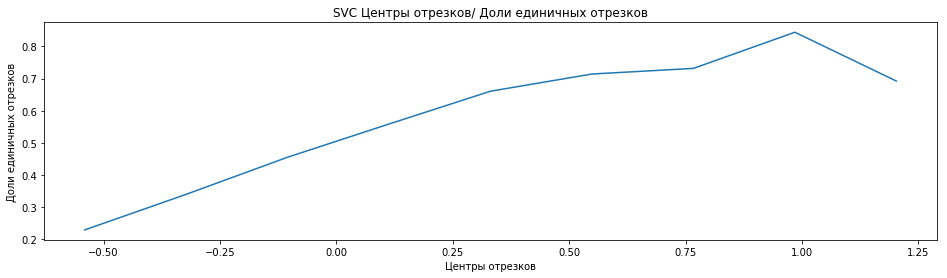

In [818]:
# Your code here
# ...
# model_SVC = LinearSVC(random_state = 42)
# model_SVC.fit(X_train, y_train)
y_predicted_SVC = model_SVC.decision_function(X_test)
plt.title("SVC Центры отрезков/ Доли единичных отрезков")
plt.xlabel('Центры отрезков')
plt.ylabel('Доли единичных отрезков')
plot_calibration_curve(y_test, y_predicted_SVC, n_bins=10)
plt.show()

#### Это не вероятность, а расстояние до гиперплоскости
Вставим ее в сигмоид, для нормировки

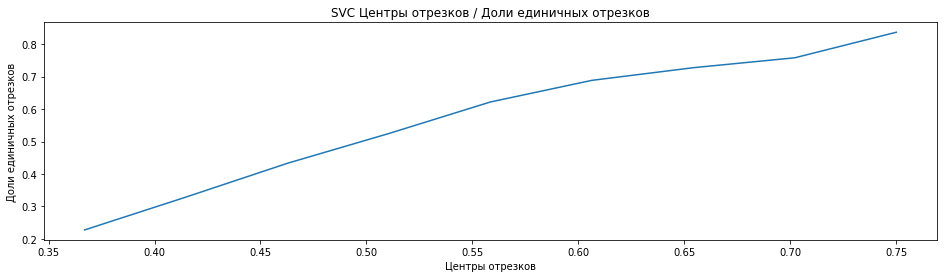

In [819]:
# Your code here
# ...
y_predicted_SVC = sigmoid(model_SVC.decision_function(X_test))
plt.title("SVC Центры отрезков / Доли единичных отрезков")
plt.xlabel('Центры отрезков')
plt.ylabel('Доли единичных отрезков')
plot_calibration_curve(y_test, y_predicted_SVC, n_bins=10)
plt.show()

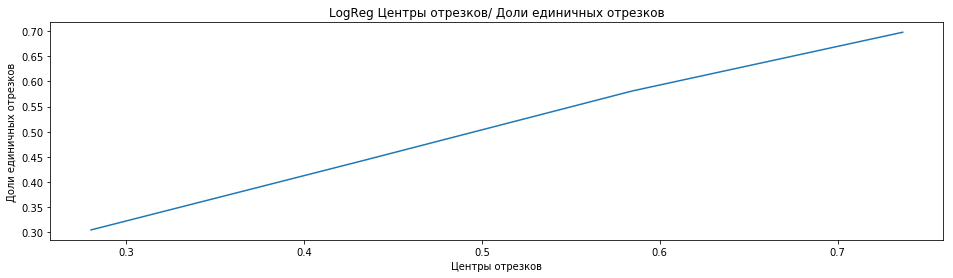

In [817]:
# Your code here
# ...
model_LR = LogReg(max_iter = 1000, lambda_1=0, lambda_2=0, alpha=0.2, tolerance=1e-8, verbose = False)
model_LR.fit(X_train, y_train)
y_predicted_LR = model.predict_proba(X_test)[:,1]
plt.title("LogReg Центры отрезков/ Доли единичных отрезков")
plt.xlabel('Центры отрезков')
plt.ylabel('Доли единичных отрезков')
plot_calibration_curve(y_test, y_predicted_LR, n_bins=5)
plt.show()

##### Все распределения

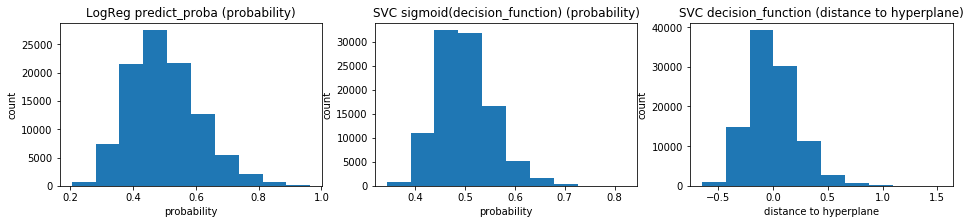

In [830]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(16,3)
ax1.set_title("LogReg predict_proba (probability)")
ax1.set_xlabel('probability')
ax1.set_ylabel('count')
ax1.hist(y_predicted_LR)

ax2.set_title("SVC sigmoid(decision_function) (probability)")
ax2.set_xlabel('probability')
ax2.set_ylabel('count')
ax2.hist(sigmoid(model_SVC.decision_function(X_test)))

ax3.set_xlabel('distance to hyperplane')
ax3.set_ylabel('count')
ax3.set_title("SVC decision_function (distance to hyperplane)")
ax3.hist(model_SVC.decision_function(X_test))

plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

Logistic:
	Brier: 0.238
	Accuracy_score: 0.588
	Precision: 0.596
	Recall: 0.549
	F1: 0.571

SVC:
	Brier: 0.243
	Accuracy_score: 0.587
	Precision: 0.596
	Recall: 0.546
	F1: 0.570

SVC + Isotonic:
	Brier: 0.252
	Accuracy_score: 0.551
	Precision: 0.683
	Recall: 0.193
	F1: 0.301

SVC + Sigmoid:
	Brier: 0.238
	Accuracy_score: 0.588
	Precision: 0.596
	Recall: 0.549
	F1: 0.572



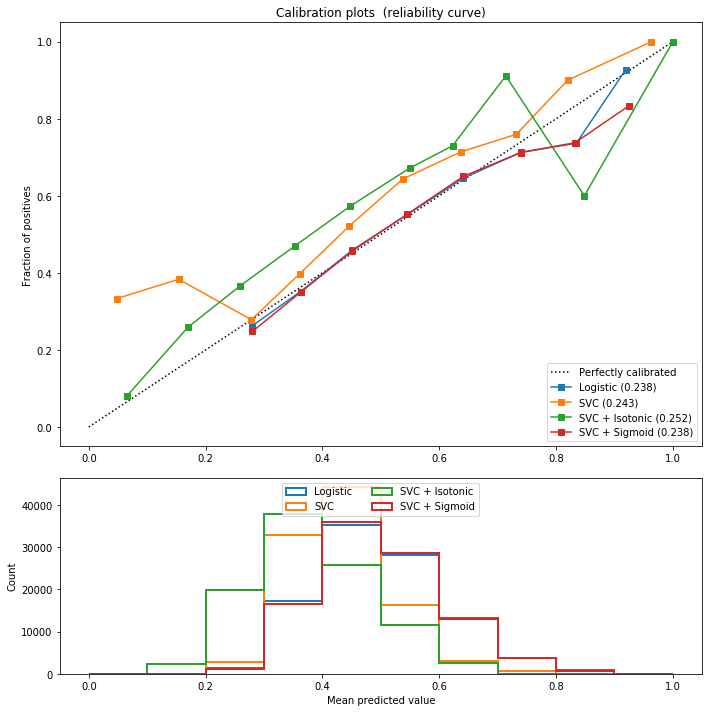

In [835]:
# Your code here
# ...
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tAccuracy_score: %1.3f" % accuracy_score(y_test, y_pred))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

plot_calibration_curve(LinearSVC(), "SVC", 2)

plt.show()

# Thank's for code for 
# http://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

#### Вывод: в данном примере, калибровка не сильно улучшила результат

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
# Will be in future

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было ранее). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
# Your code here
# ...

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(1 балл)__

In [ ]:
# Your code here
# ...

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
- вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени)
- вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации)
- внесение некоторого шума в посчитанные признаки. 

__Задание 3.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.25 балла)__

__(Бонусная часть)__ Посчитайте корректные счётчики одним из двух способов описанных выше (не забудьте добавить и шум). 

In [ ]:
# Your code here
# ...

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1] + C * global\_mean}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 4.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(0.75 балла)__

In [ ]:
# Your code here
# ...

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ ...

**Задание 5.** Какой лучший мем в 2k17?

__Ответ:__ ...


**Задание 6.** Поделитесь лучшим стикерпаком. Только там не должно быть преподавателей и ассистентов этого курса.

__Ответ:__ ...

## Часть 5 (бонус). Vowpal Wabbit

1 час

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.